# Some Initiation Code.

In [164]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import LeavePGroupsOut
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


def get_file_list():
    path = "../data/FixedInterval Agrregates"
    owd = os.getcwd()
    os.chdir(path)
#     print(os.listdir())
    file_list = [student for student in os.listdir() if "student" in student]
    files= [ path+"/"+student+"/one_day_aggregate.csv" for student in file_list]
    os.chdir(owd)
    
    return files

def adjust_stress_values(stress_level):
    mapping = {
        1:2,
        2:3,
        3:4,
        4:1,
        5:0
    }
    
    return mapping[stress_level]

def get_data(stress_agg='min', verbose=False, scaling=False):

    train_data = pd.DataFrame()
    file_list = get_file_list()
    student_count = len(file_list)

    for file in file_list:
        temp_data = pd.read_csv(file,
                                index_col=0,
                                header=[0, 1])
        
        train_data = train_data.append(temp_data)

    # Now that the data has been read let us produce test train split, since it is global generalized we
    train_data["set"] = "training_set"
    
    # Fixing Inf Values, NaN values in df.
    train_data.replace(np.inf, 10000000, inplace=True)
    train_data.replace(-np.inf, -10000000, inplace=True)
    train_data.fillna(method='pad', inplace=True)
    train_data.fillna(value=0, inplace=True)
    
    # Slicing our train set into labels and training data.
    students, train_x, train_y = train_data.iloc[:, 0], train_data.iloc[:, 1:-3], train_data.loc[:, ("stress_level", stress_agg)]
    
    # Calculating Label Distribution for train and test.
    train_label_dist = train_y.value_counts()
    
    # Adjusting the Stress values to a scale from 0-4.    
    train_y = train_y.apply(adjust_stress_values)
    
    if verbose:
        display(train_y.value_counts().sort_index())
        display(train_x.head(2))
        display(train_y.head(2))
    
    if scaling:
        # Transforming Data by getting custom transformer.
        transformer = StandardScaler()
        train_x = transformer.fit_transform(train_x)
    
        
    return students, train_x, train_y

students, train_x, train_y = get_data(verbose=False)

Visualizing the variances of each Columns. By looking at the variances of few of the feature, we find that most of them are pretty low. We can chose only the ones that have a variance greated that 0.1.

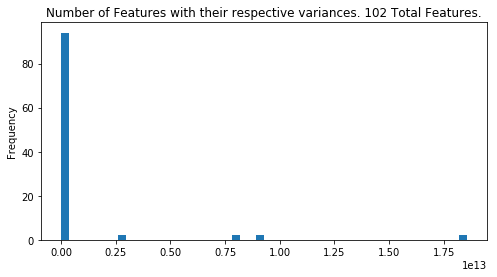

In [168]:
variance = train_x.var(axis=0)

# Plotting HistoGram of Variances.
plt.figure(figsize=(8,4))
variance.plot.hist(bins=50)
plt.title("Number of Features with their respective variances. 102 Total Features.")
plt.show()


# # Seeing Variance of each column.
# variance = pd.DataFrame(variance)
# variance.reset_index(inplace=True)
# variance["x_label"] = variance["level_0"] + "_"  + variance["level_1"]
# variance.drop(columns=["level_0", "level_1"], inplace=True)
# plt.ylim(10)
# plt.bar(variance.iloc[:, 1], variance.iloc[:, 0])

# plt.show()

# Doing Feature Selection using a Variance Threshold.

In [169]:
from sklearn.feature_selection import VarianceThreshold

def feature_selection_var(train_x, verbose=False):
    
    var_selector = VarianceThreshold(threshold=5)
    var_selector.fit(train_x)
    selected = var_selector.get_support(indices=True)
    not_selected = [i for i in range(0,102) if i not in selected ]
    result = train_x.iloc[:, selected]
    
    if verbose:
        print("Selected :{} features form :{}".format( len(selected), len(train_x.columns)))
        print("Features Selected are:")
    
    selected = list(train_x.iloc[:, selected].columns)
    not_selected = list(train_x.iloc[:, not_selected].columns)

    if verbose:
        print("Selected Features")
        for feature in selected:
            print(feature)

        print("\n")
        print("\n")
        print("Not Selected Features")
        for feature in not_selected:
            print(feature)

    return result
              
refine_train_x = feature_selection_var(train_x)

In [170]:
display(refine_train_x.head())

sum               skew           kurtosis  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24                0.0           0.000000          -3.000000   
2013-03-25                0.0           0.000000           0.000000   
2013-03-26                0.0           0.000000           0.000000   
2013-03-27              785.0           4.499333          20.393834   
2013-03-28             1145.0           3.928749          16.500230   

                          mcr                      sum  \
           activity_inference audio_activity_inference   
time                                                     
2013-03-24                0.0                      8.0   
2013-03-25                0.0                      0.0   
2013-03-26                0.0                      0.0   
2013-03-27               88.0                  19527.0   
2013-03-28              205.0                  35482.0   

                               skew                 linear_m  \
           audio_activity_inference audio_activity_inference   
time                                                           
2013-03-24                 0.000000            -2.373757e-16   
2013-03-25                 0.000000             0.000000e+00   
2013-03-26                 0.000000             0.000000e+00   
2013-03-27                 0.675752             2.104893e-05   
2013-03-28                 0.213924             2.407349e-05   

                             poly_a                 kurtosis  \
           audio_activity_inference audio_activity_inference   
time                                                           
2013-03-24             0.000000e+00                -3.000000   
2013-03-25             0.000000e+00                 0.000000   
2013-03-26             0.000000e+00                 0.000000   
2013-03-27            -8.387943e-10                -1.083492   
2013-03-28             3.157735e-09                -1.509119   

                                mcr     ...                      poly_a  \
           audio_activity_inference     ...      phonelock_duration_min   
time                                    ...                               
2013-03-24                      0.0     ...                6.210631e-14   
2013-03-25                      0.0     ...                0.000000e+00   
2013-03-26                      0.0     ...                0.000000e+00   
2013-03-27                   3962.0     ...                1.964286e+01   
2013-03-28                   3364.0     ...                7.500000e-01   

                           poly_b                 poly_c  \
           phonelock_duration_min phonelock_duration_min   
time                                                       
2013-03-24          -2.779926e-13             465.000000   
2013-03-25           0.000000e+00               0.000000   
2013-03-26           0.000000e+00               0.000000   
2013-03-27          -1.898714e+02             512.285714   
2013-03-28           2.245000e+01              64.450000   

                              iqr         sum                     mean  \
           phonelock_duration_min hours_slept sleep_rating hours_slept   
time                                                                     
2013-03-24                   0.00        28.0          8.0         7.0   
2013-03-25                   0.00         0.0          0.0         0.0   
2013-03-26                   0.00         0.0          0.0         0.0   
2013-03-27                 355.00        21.0          6.0         7.0   
2013-03-28                  61.75        20.0          2.0        10.0   

                   min         max          sum  
           hours_slept hours_slept sms_instance  
time                                             
2013-03-24         7.0         7.0         23.0  
2013-03-25         0.0         0.0         24.0  
2013-03-26         0.0         0.0       